# <font color=red> The goal of this project is use machine learning to create a model that predicts which passengers survived the Titanic shipwreck </font>

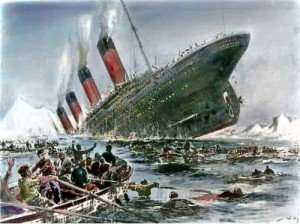

In [1]:
from IPython.display import Image
Image("titanic.jpg")

In [3]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#Importing dataset
df= pd.read_csv("titanic.csv")

## 1. Exploratory Data Analysis

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <font color=black> Variable Description </font>
- PassengerId: <font color=black> passenger's **ID** </font> 
- Survived: <font color=black> **0** </font>= No, <font color=black> **1** </font>= Yes
- PClass: Passenger Class=<font color=black> (1=**1st**. 2=**2nd**,3=**3rd**) </font>
- Name: <font color=black> passenger's **name** </font> 
- Sex: <font color=black> passenger's **sex** </font> 
- Age: <font color=black> passenger's **age** </font> 
- SibSp: <font color=black> **number** of Siblings/Spouses Aboard </font> 
- Parch: <font color=black> **number** of Parents/Children Aboard </font>
- Ticket: <font color=black> **Ticket number** </font> 
- Fare: <font color=black> **Passenger Fare** (British pound) </font> 
- Cabin: <font color=black> **Cabin ID** </font> 
- Embarked: <font color=black> **Port of Embarkation** </font> C=Cherbourg, Q=Queenstown, S=Southampton

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2. Data Visualization

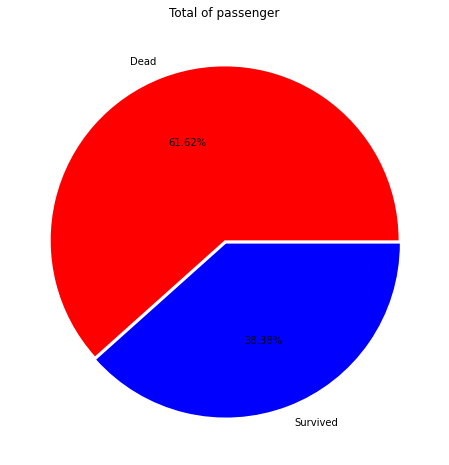

In [9]:
#Survived and dead
plt.figure(figsize=(8,8))
plt.pie(df["Survived"].value_counts(), colors=["red", "blue"], labels=["Dead","Survived"], autopct='%.2f%%', explode=[0,0.02] )
plt.title("Total of passenger");

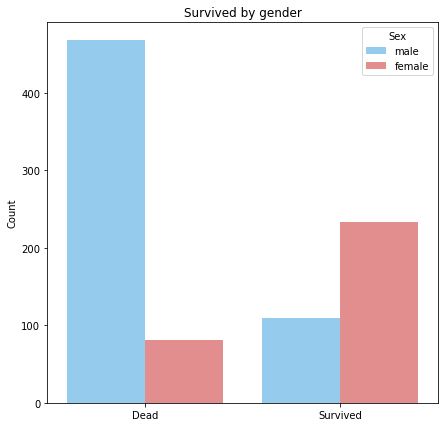

In [13]:
#Gender analysis
plt.figure(figsize=(7,7))
gender_colors = ['lightskyblue', 'lightcoral']
plt.title("Survived by gender")
x=sns.countplot(data=df, x="Survived", hue='Sex', palette=gender_colors)
plt.xticks([0,1],["Dead", "Survived"])
x.set(xlabel=None, ylabel="Count");

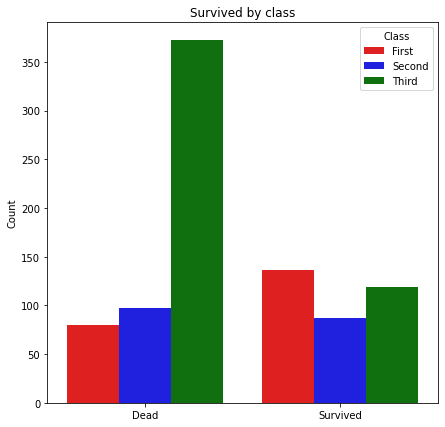

In [14]:
#Class Analysis
plt.figure(figsize=(7,7))
colors = ['red', 'blue', 'green']
plt.title("Survived by class")
y=sns.countplot(data=df, x="Survived", hue='Pclass', palette=colors)
plt.xticks([0,1],["Dead", "Survived"])
plt.legend(title="Class", loc="upper right", labels=["First","Second", "Third"])
y.set(xlabel=None,ylabel="Count");

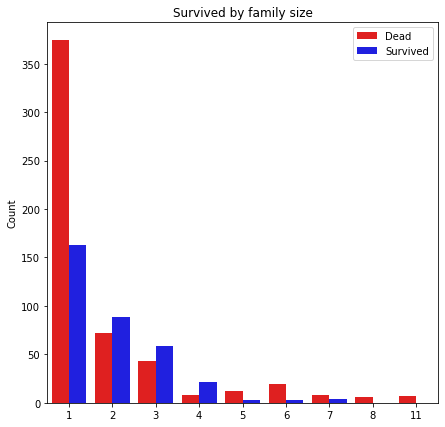

In [15]:
#Family size analysis
df["Family_size"]=df['SibSp']+df['Parch']+1
f_colors = ['red', 'blue']
plt.figure(figsize=(7,7))
plt.title("Survived by family size")
y=sns.countplot(data=df, x="Family_size", hue='Survived', palette=f_colors)
plt.legend(loc="upper right", labels=["Dead","Survived"])
y.set(xlabel=None,ylabel="Count");

In [16]:
df.drop(["Family_size"], axis=1, inplace=True)

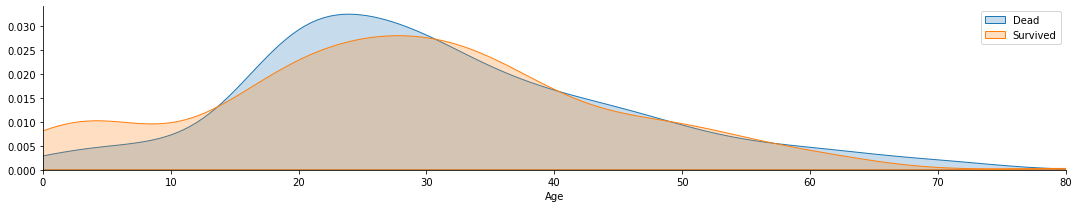

In [17]:
#Age analysis
facet = sns.FacetGrid(df, hue="Survived", aspect=5)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df["Age"].max()))
plt.legend(loc="upper right", labels=["Dead","Survived"]);

## 3. Data Preprocessing

In [18]:
#Removal non-significant variables
df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1, inplace=True)

In [19]:
#Checking for null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
#Fill the null values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode() [0], inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
#Convert categorical data into numerical data.

In [22]:
df = pd.get_dummies(df, columns=['Embarked','Pclass'])

In [23]:
df = pd.get_dummies(df, columns=['Sex'],drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_1    891 non-null    uint8  
 9   Pclass_2    891 non-null    uint8  
 10  Pclass_3    891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(7)
memory usage: 41.0 KB


In [25]:
#Variable standardization

In [26]:
Ss = StandardScaler()
df[['Age','Fare','SibSp','Parch']] = Ss.fit_transform(df[['Age','Fare','SibSp','Parch']])

In [27]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_male
0,0,-0.565736,0.432793,-0.473674,-0.502445,0,0,1,0,0,1,1
1,1,0.663861,0.432793,-0.473674,0.786845,1,0,0,1,0,0,0
2,1,-0.258337,-0.474545,-0.473674,-0.488854,0,0,1,0,0,1,0
3,1,0.433312,0.432793,-0.473674,0.420730,0,0,1,1,0,0,0
4,0,0.433312,-0.474545,-0.473674,-0.486337,0,0,1,0,0,1,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked_C  891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_1    891 non-null    uint8  
 9   Pclass_2    891 non-null    uint8  
 10  Pclass_3    891 non-null    uint8  
 11  Sex_male    891 non-null    uint8  
dtypes: float64(4), int64(1), uint8(7)
memory usage: 41.0 KB


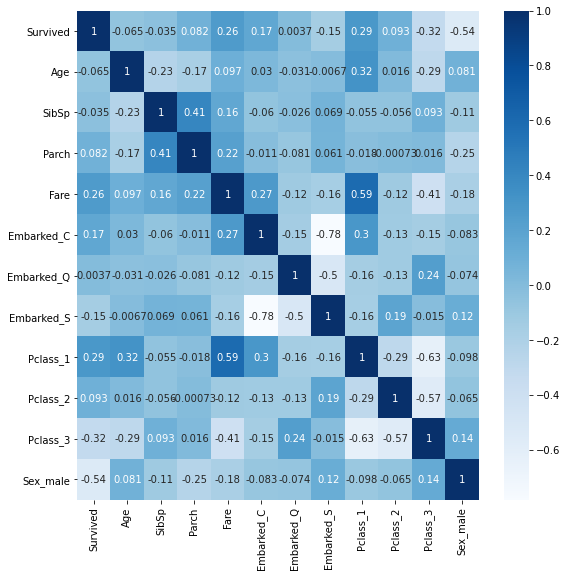

In [29]:
#Plotting Heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap="Blues");

In [30]:
#Train-Test Split

In [31]:
X= df.loc[:, df.columns != 'Survived'].values
y= df.loc[:, df.columns == 'Survived'].values.squeeze()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [33]:
#Label balance control
print(np.bincount(y_train)/len(y_train), np.bincount(y_test)/len(y_test))

[0.61657303 0.38342697] [0.61452514 0.38547486]


## 4. Building Models

### <font color=blue> 4.1 Decision tree </font>

In [34]:
#Model selection on Validation set
score_fnc= balanced_accuracy_score
param_grid= {"max_depth":np.logspace(0.5, 2, 20).astype(int),"min_samples_leaf":np.logspace(0.5, 1.5, 10).astype(int)}

val_cv= StratifiedKFold(n_splits=5, shuffle=True)
model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  3,   3,   4,   5,   6,   7,   9,  11,  13,  16,  19,  23,  28,
        33,  40,  48,  57,  69,  83, 100]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  8, 11, 14, 18, 24, 31])},
             scoring=make_scorer(balanced_accuracy_score))

In [35]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'max_depth': 23, 'min_samples_leaf': 11}, 0.8092363288052944)

In [36]:
#Prediction on Test set
models={}
Tree=DecisionTreeClassifier(max_depth=23,min_samples_leaf=11,criterion='entropy', class_weight='balanced')
Tree.fit(X_train,y_train)
prediction=Tree.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
Decision_Tree = {'Decision_Tree':result}
models.update(Decision_Tree)

In [37]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.72      0.72      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### <font color=blue> 4.2 K-Nearest Neighbours </font>

In [38]:
#Model selection on Validation set
param_grid= {"n_neighbors":np.arange(1,20,2)}

val_cv= StratifiedKFold(n_splits=5, shuffle=True)
model = KNeighborsClassifier()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid , scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring=make_scorer(balanced_accuracy_score))

In [39]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'n_neighbors': 7}, 0.7857082317427146)

In [40]:
#Prediction on Test set
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
prediction=KNN.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
KNNeighbors = {'KNNeighbors':result}
models.update(KNNeighbors)

In [41]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       127
           1       0.58      0.77      0.66        52

    accuracy                           0.77       179
   macro avg       0.74      0.77      0.74       179
weighted avg       0.80      0.77      0.78       179



### <font color=blue> 4.3 Logistic Regression </font>

In [48]:
#Model selection on Validation set
param_grid= {"penalty": ["l1","l2"],'C': [0.01, 0.1, 1, 10, 100]}
val_cv= StratifiedKFold(n_splits=5, shuffle=True)
model = LogisticRegression()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring=make_scorer(balanced_accuracy_score))

In [49]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'C': 1, 'penalty': 'l2'}, 0.7908504586090792)

In [50]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
LogisticR = {'LogisticR':result}
models.update(LogisticR)

In [51]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       122
           1       0.64      0.77      0.70        57

    accuracy                           0.79       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.80      0.79      0.79       179



### <font color=blue> 4.4 Support Vector Machine </font>

In [68]:
#Kernel RBF
param_grid= {'kernel':['rbf'],'gamma': [0.001, 0.01, 0.1, 1],'C': [0.01, 0.1, 1, 10, 100]}
val_cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
model = svm.SVC()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             scoring=make_scorer(balanced_accuracy_score))

In [69]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8043016370602578)

In [70]:
#Kernel linear
param_grid= {'kernel':['linear'],'C': [0.01, 0.1, 1, 10, 100]}
val_cv= StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
model = svm.SVC()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
             scoring=make_scorer(balanced_accuracy_score))

In [71]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'C': 0.1, 'kernel': 'linear'}, 0.7696572042261698)

In [72]:
#Kernel Poly
param_grid= {'kernel':['poly'],'C': [0.01, 0.1, 1, 10, 100], 'degree': [2,3,4]}
val_cv= StratifiedKFold(n_splits=5, shuffle=True,random_state=1)
model = svm.SVC()
model_selection= GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(score_fnc), cv=val_cv)
model_selection.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['poly']},
             scoring=make_scorer(balanced_accuracy_score))

In [73]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'C': 1, 'degree': 2, 'kernel': 'poly'}, 0.8062153140601417)

In [74]:
#Prediction on Test set
svc=svm.SVC(kernel="poly",C=1, degree=2)
svc.fit(X_train,y_train)
prediction=svc.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
SupportVectorM = {'SupportVectorM':result}
models.update(SupportVectorM)

In [75]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       126
           1       0.64      0.83      0.72        53

    accuracy                           0.81       179
   macro avg       0.78      0.82      0.79       179
weighted avg       0.84      0.81      0.82       179



### <font color=blue> 4.5 Random Forest </font>

In [76]:
param_grid= {"max_features":np.arange(1,12), "n_estimators": np.arange(10,100,10)}

val_cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=12)
model = RandomForestClassifier()
model_selection= RandomizedSearchCV(estimator=model, param_distributions=param_grid , scoring=make_scorer(score_fnc), 
                                    cv=val_cv, 
                                    n_iter=50)
model_selection.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   scoring=make_scorer(balanced_accuracy_score))

In [77]:
#Hyperparameters chosen
model_selection.best_params_, model_selection.best_score_

({'n_estimators': 20, 'max_features': 9}, 0.800851329385812)

In [78]:
#Prediction on Test set
RC=RandomForestClassifier(max_features=9,n_estimators=20)
svc.fit(X_train,y_train)
prediction=svc.predict(X_test)
result=balanced_accuracy_score(prediction,y_test)
RandomForest = {'RandomForest':result}
models.update(RandomForest)

In [79]:
#Classification Report
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       126
           1       0.64      0.83      0.72        53

    accuracy                           0.81       179
   macro avg       0.78      0.82      0.79       179
weighted avg       0.84      0.81      0.82       179



In [80]:
#Accuracy of models
for key, value in models.items():
    print(key, ' : ', round(value,4))

Decision_Tree  :  0.776
KNNeighbors  :  0.7704
LogisticR  :  0.7835
SupportVectorM  :  0.8159
RandomForest  :  0.8159


# :)